# Базовые алгоритмы поиска
Рассмотрим следующую задачу: дано множество $\mathcal{D}$ и точка $x\in \mathcal{D}$, есть некоторый оракул, который для подмножества $A\subset\mathcal{D}$ умеет отвечать на запрос находится ли $x$ в $A$ или нет. Сколько нужно сделать запросу к оракулу, чтобы как можно точнее определить $x$?

Давайте предположим, что мы сделали $n$ запросов по множествам $A_1, \ldots, A_n$, при этом на запросы с индексами $I_n=\{i_1, \ldots,i_m\}$ ответы были положительными, а на остальных $J_n=\{1, \ldots, n\}\setminus I_n$ -- отрицательные, тогда мы мы знаем, что
$$
x\in\mathcal{B}_n=\left[\cap_{i\in I_n}A_i\right]\cap\left[\cap_{i\in J_n}\mathcal{D}\setminus A_i\right]
$$
Далее описанную процедуру поиска будем называть <b>общим поисковым алгоритмом</b>, которая всегда однозначно характеризуется $\mathcal{D}$, $n$, $\{A_1, \ldots, A_n\}$ и $I_n$.
Если $\mathcal{D}$ -- конечное множество, то отсекая на каждом шаге хотя бы по одному элементу мы в итоге можем точно определить $x$, в случае же непрерывного множества мы можем только сузить его до какого-то размера. Есть две характеристики множества, которые нам интересны в данном контексте: диаментр и объем. Если у множества небольшой диаметр, то это гарантирует, что произвольно взятый элемент из множества находится на расстоянии от $x$ не больше, чем на диаментр. Малый объем к сожалению не гарантирует малый диаметр, поэтому объем не очень интересная характеристика в конечном счете, тем не менее через объем получается доказать нижнюю оценку на оптимальное количество запросов.

Пусть $\mu$ -- мера на $\mathcal{D}$ и $\mu(\mathcal{D})<+\infty$, следующая теорема фиксирует ключевую оценку на количество запросов к оракулу, которое нужно сделать

<b>Теорема.</b> В общем поисковом алгоритме для нахождения множество $B$ такого, что $\mu(B)\leq V$ и при этом $x\in B$ необходимо по меньшей мере
$\log_2\frac{\mu(\mathcal{D})}{V}$ запросов к оракулу.

<b>Доказательство.</b> Предположим, что мы сделали $n$ итераций и получили множество $B_n$, на $n+1$ итерации при запросе множества $A_{n+1}$ имеем два варианта
$$
\begin{cases}
x\in B\cap A_{n+1} \\
x\in B\cap (\mathcal{D}\setminus A_{n+1})
\end{cases}
$$
таким образом в худшем случае
$$
\mu(B_{n+1})\geq \max\{\mu(B\cap A_{n+1}), \mu(B\cap (\mathcal{D}\setminus A_{n+1}))\}\geq \frac{\mu(B_n)}{2}
$$
из чего следует оценка на количество итераций вхудшем случае
$$
\frac{\mu(\mathcal{D})}{\mu(B_n)}=\frac{\mu(B_0)}{\mu(B_n)}\leq 2^n.~~\#
$$
Стоит отметить, что минимум достигается если $A_{n+1}$ разделяет $B_n$ пополам. В качестве примера, <b><i>метод бисекции</i></b> для нахождения корня непрерывной функции на отрезке достигает этой нижней границы как в худшем, так и в среднем (в предположении, что у нас есть только один корень с равномерным распределением по отрезку) случае. Метод очень простой: изначально  у нас есть отрезок $[a;b]$ такой, что $f(a)f(b)<0$ (таким образом из непрерывности следует, что на отрезке есть хотя бы одна точка $x^*$, что $f(x^*)=0$), на каждом шаге отрезок делится пополам и остается часть, которая сохраняет этот инвариант.

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from animation_utils.animation import animate_list

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["text.usetex"] = True
import numpy as np

def f(x):
    return x ** 3 + 10 * x ** 2 + 5

def bisection_state(f, a, b, left=None, right=None):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_axes([0, 0, 1, 1])    
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    for name, spine in ax.spines.items():
        spine.set_visible(False)
        spine.set_visible(False)
        
        
    y_min = min(f(a), f(b))
    y_max = max(f(a), f(b))
    delta = (b - a) / 100
    r = np.arange(a, b + delta, delta)
    
    ax.plot(r, [f(x) for x in r])
    ax.plot([a, a], [y_min, y_max], color='black')
    ax.plot([b, b], [y_min, y_max], color='black')
    ax.plot([a, b], [0, 0], color='black', linestyle='--')
    
    if left is not None and right is not None:
        if left != a:
            ax.plot([left, left], [y_min, y_max], color='grey', linestyle='--')
        if right != b:
            ax.plot([right, right], [y_min, y_max], color='grey', linestyle='--')
        ax.scatter([left, right, (left + right) / 2], [f(left), f(right), f((left + right) / 2)], color='black')
    else:
        ax.scatter([a, b, (a + b) / 2], [f(a), f(b), f((a + b) / 2)], color='black')
        
    
    plt.close(fig)
    return fig

def bisection(g, a, b, num_iters=10):
    states = [bisection_state(g, a, b)]
    left = a
    right = b
    for i in range(num_iters):
        mid = (left + right) / 2
        if g(left) * g(mid) < 0:
            right = mid
        else:
            left = mid
        states.append(bisection_state(g, a, b, left, right))
    return states

In [3]:
animate_list(bisection(f, -12, 3), play=True, interval=500);

Play(value=0, interval=500)

interactive(children=(IntSlider(value=0, description='step', max=10), Output()), _dom_classes=('widget-interac…

Также асимптотически оптимальным является <b><i>тернарный поиск</i></b>: для функции $f:[a;b]\rightarrow\mathbb{R}$, для которой известно, что $\exists c\in(a, b)$ что $f$ убывает на $[a;c]$ и возрастает на $[c;b]$, тернарный поиск находит точку минимума $c$ следующм образом:
* Взять
$$
\begin{array}{rl}
\gamma &=\frac{1}{3}(2a+b) \\
\delta &=\frac{1}{3}(a+2b)
\end{array}
$$
* Если $f(\gamma)<f(\delta)$, то обновить $b\leftarrow \delta$ иначе $a\leftarrow \gamma$.

In [4]:
def h(x):
    return 2 * (2 - x) ** 0.5 if x <= 2 else (x - 2) ** 0.7

def trisection_state(f, a, b, left=None, right=None):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_axes([0, 0, 1, 1])    
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    for name, spine in ax.spines.items():
        spine.set_visible(False)
        spine.set_visible(False)
        
        
    y_min = min([f(t) for t in np.arange(a, b, 0.1)])
    y_max = max([f(t) for t in np.arange(a, b, 0.1)])
    delta = (b - a) / 100
    r = np.arange(a, b + delta, delta)
    
    ax.plot(r, [f(x) for x in r])
    ax.plot([a, a], [y_min, y_max], color='black')
    ax.plot([b, b], [y_min, y_max], color='black')
    
    if left is not None and right is not None:
        if left != a:
            ax.plot([left, left], [y_min, y_max], color='grey', linestyle='--')
        if right != b:
            ax.plot([right, right], [y_min, y_max], color='grey', linestyle='--')
        ax.scatter([left, right, (2 * left + right) / 3, (left + 2 * right) / 3], 
                   [f(left), f(right), f((2 * left + right) / 3), f((left + 2 * right) / 3)],
                   color='black')
    else:
        ax.scatter([a, b, (2 * a + b) / 3, (a + 2 * b) / 3],
                   [f(a), f(b), f((2 * a + b) / 3), f((a + 2 * b) / 3)],
                   color='black')
        
    
    plt.close(fig)
    return fig

def trisection(g, a, b, num_iters=10):
    states = [trisection_state(g, a, b)]
    left = a
    right = b
    for i in range(num_iters):
        gamma = (2 * left + right) / 3
        delta = (left + 2 * right) / 3
        if g(gamma) < g(delta):
            right = delta
        else:
            left = gamma
        states.append(trisection_state(g, a, b, left, right))
    return states

In [5]:
animate_list(trisection(h, -1, 6), play=True, interval=500);

Play(value=0, interval=500)

interactive(children=(IntSlider(value=0, description='step', max=10), Output()), _dom_classes=('widget-interac…

Несмотря на то, что тернарный поиск все еще делает $\mathcal{O}(\log\frac{b-a}{\epsilon})$ итераций до достижения $\epsilon$-точного решения показатель основание $\frac{3}{2}$ в отличие от $2$ у бисекции. 

Как уже было сказано, множества с малеленьким диаметром обязательно имеют маленькую меру, но не наоборот, поэтому алгоритм, выдющий нам маленькое множество не гарантирует нам хорошее приближение с точки зрения близости к оптимуму. Однако множество с малым диаметром обычно имеет и малую меру (при условии ограниченности плотности).

<b>Теорема. </b> Для общего алгоритма поиска в $\mathbb{R}^m$ выполняется нижняя оценка
$$
\max_{x\in B_n}\|x-x^*\|=\Omega\left(2^{-\frac{n}{m}}\right)
$$
где $x^*$ -- искомая точка.

<b>Доказательство</b>
От противного: допустим, что есть такая схема, пусть $\mu$ -- мера Лебега, тогда получаем, что
$$
    \mu(B_n)\leq \mu(B(x^*, \max_{x\in B_n}\|x-x^*\|))=C[\max_{x\in B_n}\|x-x^*\|]^m
$$
что противоречит нижней оценке для числа итераций общей схемы.

## Непрерывные итеративные схемы
В описанных выше методах мы оперировали с множествами, приближение из которого предполагается выбирать каким-нибудь сторонним способом. Теперь хотелось бы разобрать базовые вещи о методах, которые строят такие приближения непосредственно. В целом любой итеративный метод может быть представлен в виде
$$
x_{k+1}=g_k(x_k),
$$
где где $x\in\mathcal{D},~g_k:\mathcal{D}\rightarrow\mathcal{D}$ -- некоторая функция преобразования приближения на шаге $k$. Пока что хотелось бы понять, какие свойства можно вычленить в случае $g_k\equiv g$, т.е. когда текущее преобразование зависит только от текущего приближение, но не от номера шага. Одним из базовых свойств таких процессов является следующая теорема

<b>Теорема (Банаха о сжимающем отображении)</b>. Пусть $(X, \delta)$ -- непустое полное метрическое пространство (банахово пространство), $f$ -- сжимающее отображение на $X$ с константой $q<1$, т.е. 
$$
\delta(f(x), f(y))\leq q\delta(x, y)~~\forall x, y\in X,
$$
тогда 
* Существует единственная неподвижная точка $x^*\in X$ функции на $f$ на $X$.
* При любом $x_0\in X$ рекуррентная последовательность $x_{k+1}=f(x_k)$ сходится к $x^*$.

<b>Доказательство</b>. Для последовательности $x_{k+1}=f(x_k)$ имеет место
$$
\delta(x_{k+1}, x_k)=\delta(f(x_k), f(x_{k-1}))\leq q\delta(x_k, x_{k-1})\leq\ldots\leq q^k\delta(x_1, x_0).
$$
Таким образом, для любых $n<m$
$$
\delta (x_n, x_m)\leq \sum_{i=n}^{m-1} \delta(x_{i+1}, x_i)\leq q^n\sum_{i=0}^{m-n-1}q^i\delta (x_1, x_0)\leq \frac{q^n}{1-q}\delta(x_1, x_0),
$$
а значит $x_k$ -- фундаментальная последовательность (последовательность Коши). Так как $X$ полно, то $x_k$ имеет предел в $X$, обозначим его за $x^*$. Так как $x_k\xrightarrow{\delta}x^*$, то
$$
\delta(f(x_k), f(x^*))\leq q\delta(x_k, x^*)\rightarrow 0,
$$
т.е. $f(x_k)\xrightarrow{\delta}f(x^*)$. Переходя к пределу в рекуррентном соотношении получаем
$$
x^*=\lim_{k\rightarrow\infty}x_{k+1}=\lim_{k\rightarrow\infty}f(x_k)=f(x^*).
$$
Осталось показать единственность $x^*$: пусть $f(y)=y$, тогда
$$
\delta(x^*, y)=\delta (f(x^*), f(y))\leq q\delta(x^*, y)~\Rightarrow~\delta(x^*, y)=0~\Rightarrow~x^*=y.~~\#
$$
<i>Замечание</i>. Можно оценить скорость сходимости:
$$
\delta(x_k, x^*)\leq \sum_{i=k}^\infty \delta(x_i, x_{i+1})\leq q^k\sum_{i=0}^\infty q^i\delta(x_1, x_0)=\frac{q^k}{1-q}\delta(x_1, x_0)
$$
<i>Пример 1</i>. Легко проверить, что для функции $f:\mathbb{R}\rightarrow\mathbb{R}$, $f(x)=\frac{x+\sqrt{x^2+1}}{2}$ выполняется
$$
|f(x)-f(y)|<|x-y|,
$$
но при этом у $f$ нет неподвижных точек
$$
f(x)-x=\frac{\sqrt{x^2+1}-x}{2}> \frac{|x|-x}{2}\geq 0.
$$

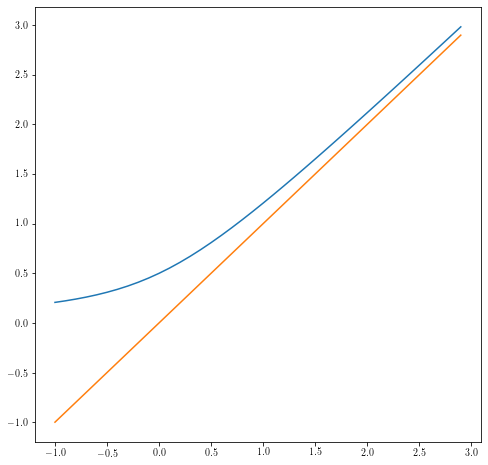

In [6]:
def no_fixed_point_example(t):
    return ((t ** 2 + 1) ** 0.5 + t) / 2

r = np.arange(-1, 3, 0.1)
plt.plot(r, [no_fixed_point_example(t) for t in r])
plt.plot(r, r)
plt.show()

<i>Пример 2.</i> Допустим мы хотим решить систему
$$
Ax=b
$$
Если $D$ -- обратимая матрица, то эту ситему можно преобразовать следующим образом
$$
x=x-D(Ax-b)
$$
Теперь, если на основе этого равенства получить рекурентную последовательность с функцией перехода $g(x)=x-D(Ax-b)$ мы получаем последовательность
$$
x_{k+1}=x_k-D(Ax_k-b)
$$
Если мы сожем подобрать $D$ так, чтобы $g$ было сжимающим отображением, то эта последовательность будет сходиться к решению исходной системы
$$
g(x)-g(y)=x-D(Ax-b)-y+D(Ay-b)=(I-DA)(x-y)
$$
Таким образом если $\|I-DA\|<1$, то мы получим сходящуюся последовательность. Одним из наиболее распространненых случаев, как этого можно добиться, применяется к матрицам с построчным диагональным приобладанием:
$$
\sum_{j\neq i}^n|A_{ij}| < A_{ii}~~\forall i
$$
тогда при $D=diag\{A_{11}^{-1}, \ldots, A_{mm}^{-1}\}$ получаем
$$
\|I-DA\|_\infty=\max_i\sum_{j=1}^mA_{ij}<1
$$
В качестве примера возьмем
$$
\left(
\begin{matrix}
1 & \frac{1}{2} & \frac{1}{4} \\
\frac{1}{2} & 1 & 0 \\
0 & \frac{1}{3} & 2
\end{matrix}
\right)
\left(
\begin{matrix}
x \\ y \\ z
\end{matrix}
\right)
=
\left(
\begin{matrix}
1 \\ 0 \\ -1
\end{matrix}
\right)
$$

In [7]:
A = np.array([
    [1, 0.5, 0.25],
    [0.5, 1, 0],
    [0, 1 / 3, 2]
])
b = np.array([1, 0, -1])
D = np.linalg.inv(np.diag(np.diag(A)))
print(D)
print('Infinity norm of I-DA:', np.linalg.norm(np.identity(3)- D @ A, ord=float('inf')))

[[1.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.  0.5]]
Infinity norm of I-DA: 0.75


x from iterations: [ 1.45945835 -0.72973043 -0.37837872]
x from numpy solution [ 1.45945946 -0.72972973 -0.37837838]


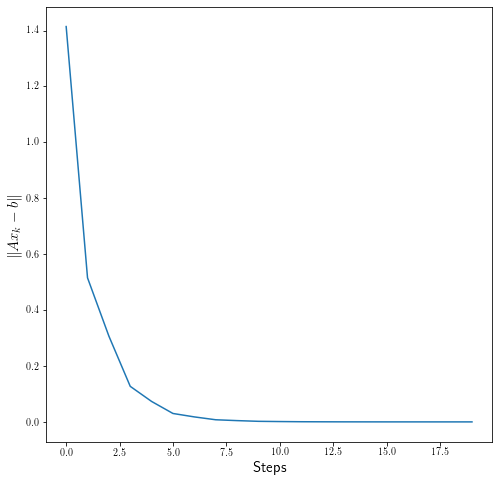

In [8]:
x = np.array([0, 0, 0])
errors = [np.linalg.norm(A @ x - b)]
for i in range(20):
    x = x - D @ (A @ x - b)
    errors.append(np.linalg.norm(A @ x - b))
plt.plot([i for i in range(20)], [errors[i] for i in range(20)])
plt.xlabel('Steps', fontsize=15)
plt.ylabel('$\|Ax_k-b\|$', fontsize=15)
print('x from iterations:', x)
print('x from numpy solution', np.linalg.solve(A, b))
plt.show()

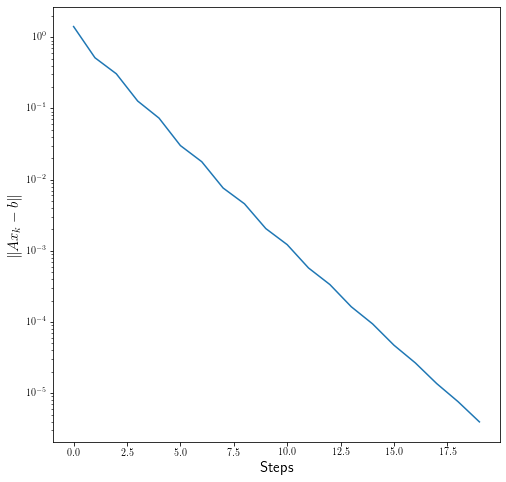

In [9]:
plt.plot([i for i in range(20)], [errors[i] for i in range(20)])
plt.yscale('log')
plt.xlabel('Steps', fontsize=15)
plt.ylabel('$\|Ax_k-b\|$', fontsize=15)
plt.show()

<i>Пример 3.</i> Рекуррентная последовательность второго порядка
$$
x_{k+1}=\frac{x_k+x_{k-1}}{2}
$$
может быть представлена в виде 2-мерной линейной последовательности первого порядка 
$$
\left(
\begin{matrix}
x_{k+1} \\ x_k
\end{matrix}
\right)
=
\left(
\begin{matrix}
\frac{1}{2} & \frac{1}{2}\\
1 & 0
\end{matrix}
\right)
\left(
\begin{matrix}
x_k \\ x_{k-1}
\end{matrix}
\right)
$$
Эта матрица имеет собственные числа $\left\{1, -\frac{1}{2}\right\}$, т.е. указанное отображение не является сжимающим, тем не менее последовательность имеет предел (без доказательства), давайте поймем каким он должен быть.

Если последовательность сходится, то предел линеен по $x_0, x_1$, это можно обусловить например тем, что $y_k\rightarrow y^*\Leftrightarrow A^ky_0\rightarrow y^*\Leftrightarrow A_k\rightarrow A^*$, где $y_k=(x_{k+1}, x_k)^T$. Таким образом можно заключить, что существуют $v=(v_1, v_2)^T$ такие, что
$$
\lim x_k=v^Ty_0
$$
Очевидным образом $v^Ty_0=v^Ty_1$ так как $\lim y_k=\lim y_{k+1}$, таким образом 
$$
v^TAy_0=v^Ty_0
$$
Если это выполняется для любого $y_0$, то $v$ -- левый собственный вектор $A$ для единицы, что дает нам $v_1=2v_2$. Далее поможет следующее соображение: очевидным образом для вектора $y_0=(z, z)$ выполняется
$$
Ay_0=y_0
$$
и следовательно предел также равен $y_0$, из чего можно заключить $v_0z+v_1z=z\Rightarrow v_0+v_1=1$. Таким образом $v=(2/3, 1/3)^T$ и соответственно
$$
x_k\rightarrow \frac{x_0+2x_1}{3}
$$
Указанные рассуждения являются следтвиями теоремы <i>Перрона-Фробениуса</i>, которая утверждает в том числе, что $\lim A^k=\frac{1}{v^Tw}vw^T$, где $v, w$ -- левый и правый собственные вектора $A$, соответствующие с.ч. $1$.

In [10]:
A = np.array([
    [1 / 2, 1 / 2],
    [1, 0],
])
eigvals, right_eigvecs = np.linalg.eig(A)
_, left_eigvecs = np.linalg.eig(A.T)
v = right_eigvecs[:,0]
w = left_eigvecs[:,0]
P = np.outer(v, w.T) / (v.T@w)
print(P)

[[0.66666667 0.33333333]
 [0.66666667 0.33333333]]


In [11]:
x, y = (0, 1)
print('Multiplyied by Perron operator:', P @ np.array((x, y)))
for i in range(100):
    x, y = ((x + y) / 2, x)

print('After some iterations', x, y)

Multiplyied by Perron operator: [0.33333333 0.33333333]
After some iterations 0.33333333333333337 0.33333333333333337


In [12]:
def recurrent_state(points):
    fig = plt.figure(figsize=(7, 2))
    ax = fig.add_axes([0, 0, 1, 1])    
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    for name, spine in ax.spines.items():
        spine.set_visible(False)
        spine.set_visible(False)
        
    ax.set_ylim((-0.4, 0.05))
        
    delta = 0.1
    r = np.arange(points[0], points[1] + delta, delta)
    
    ax.plot([points[0]])

    ax.scatter(points[:-1], [0 for _ in points[:-1]], color='black')
    ax.scatter(points[-1:], [0 for _ in points[-1:]], color='blue')
    ax.scatter([(points[0] + 2 * points[1]) / 3], [0], color='red')
    ax.text(points[0]-0.05, -0.1, "$x_0$", fontsize=25)
    ax.text(points[1]-0.05, -0.1, "$x_1$", fontsize=25)
    ax.text((points[0] + 2 * points[1]) / 3 - 0.1, -0.1, r"$\frac{1}{3}(x_0+2x_1)$", fontsize=25)
    
    plt.close(fig)
    return fig

def recurrence(x0, x1, iters=10):
    points = [x0, x1]
    states = [recurrent_state(points)]
    for i in range(iters):
        points.append(0.5 * (points[-1] + points[-2]))
        states.append(recurrent_state(points))
    return states

animate_list(recurrence(0, 1), play=True, interval=400);

Play(value=0, interval=400)

interactive(children=(IntSlider(value=0, description='step', max=10), Output()), _dom_classes=('widget-interac…

## Итеративные процессы с квадратичной сходимостью
Процессы, которые достигают точности $\epsilon$ за $\mathcal{O}(\log\epsilon^{-1})$ обычно называют линейными, так как это эквивалентно
$$
\frac{\|x_{k+1}-x^*\|}{\|x_k-x^*\|}\leq q<1
$$
Некоторые процессы (в том числе и в оптимизации) имеют скорость более быструю скорость сходимости. Один из самых распространенных сублинейных процессов -- квадратичный, таким процессом является например метод Ньютона.

<b>Определение.</b> Функция $f:X\rightarrow Y$ называется непрерывной по Липшицу с константой $L$ если
$$
\|f(x)-f(y)\|\leq L\|x-y\|.
$$
В частности функция сжимающая, если она непрервна по Липшицу с $L<1$.

<b> Лемма (о функции с непрерывным по Липшицу градиентом) </b>. Дифференцируемая функция $f$ с непрерывным по Липшицу градиентом обладает свойствами
$$
(f(x)-f(y))^T(x-y)\leq L\|x-y\|^2 \\
f(y)\leq f(x)+\nabla f(x)^T(y-x)+\frac{L}{2}\|x-y\|^2
$$
если при этом $f$ дважды дифференцируема, то
$$
\nabla^2 f(x)\preceq LI.
$$
<b>Доказательство</b>. Если $\nabla f$ непрерывна по Липшицу, то
$$
(f(x)-f(y))^T(x-y)\leq \|f(x)-f(y)\|\|x-y\|\leq L\|x-y\|^2.
$$
Остальные неравенства доказываются по аналогии с сильной выпуклостью.

<b>Теорема (о квадратичной сходимости).</b> Пусть $f:\mathbb{R}^n\rightarrow\mathbb{R}^n$, $x^*=f(x^*)$, $f$ дифференцируема на $S=\{||x-x^*||\leq ||x_0-x^*||\}$, $\nabla f$ удовлетворяет условию Липшица с константой $L$, $\nabla f(x^*)=0$ и $q=\frac{L}{2}||x_0-x^*||<1$, то
последовательность $x_{k+1}=f(x_k)$ удовлетворяет
$$
||x_k-x^*||\leq \frac{2}{L}q^{2^k}
$$

<b>Доказательство.</b>
$$
||x_1-x^*||= ||f(x_0)-f(x^*)||=||f(x_0)-f(x^*)-\nabla f(x^*)^T(x_0-x^*)||\leq \frac{L}{2}||x_0-x^*||^2
$$
В частности $||x_1-x^*||\leq q||x_0-x^*||$, т.е. $x_1\in S$, что позволяет повторить оценку для $x_2, \ldots$
$$
\begin{array}{rl}
||x_{k}-x^*||&\leq \frac{L}{2}||x_{k-1}-x^*||^2\\
&\leq \left(\frac{L}{2}\right)^{2^k-1}||x_0-x^*||^{2^k}=\frac{2}{L}q^{2^k}~~\#
\end{array}
$$

<i>Пример</i>. В общем случае в методе Ньютона довольно трудно проверить условие $\nabla f(x^*)=0$, но довольно легко проверяется например для вычисления $\sqrt{a}$ последовательностью
$$
x_{k+1}=\frac{1}{2}\left(x_k+\frac{a}{x_k}\right)
$$
Во-первых,
$$
\left.\frac{d}{dx}\left(x+\frac{a}{x}\right)\right|_{x=\sqrt{a}}=\left.\left(1-\frac{a}{x^2}\right)\right|_{x=\sqrt{a}}=0
$$
Во-вторых, $x_k$ возрастает, если $x_0\in(0, \sqrt{a})$, и убывает, если $x_0>\sqrt{a}$. Из этого легко заключить, что последовательность сходится к $\sqrt{a}$ при $x_0>0$. Так как $f'$ непрерывна на $(0, +\infty)$, то она непрерывна по Липшицу на любом замкнутом отрезке $[a; b]\subset(0, \infty)$, а значит начиная с некоторого момента метод Ньютона имеет квадратичную сходимость

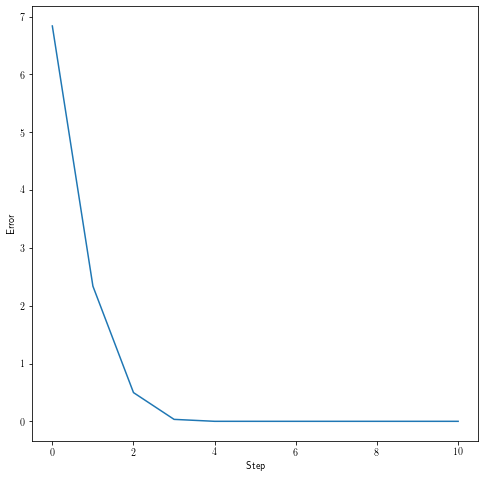

In [13]:
def newton_sqrt(a, iters=10):
    sequence = [a]
    for i in range(iters):
        sequence.append(0.5 * (sequence[-1] + a / sequence[-1]))
    return sequence[-1], sequence

a = 10
root, estimates = newton_sqrt(a)
plt.plot([i for i in range(len(estimates))], [x - a ** 0.5 for x in estimates])
plt.xlabel('Step')
plt.ylabel('Error')
plt.show()

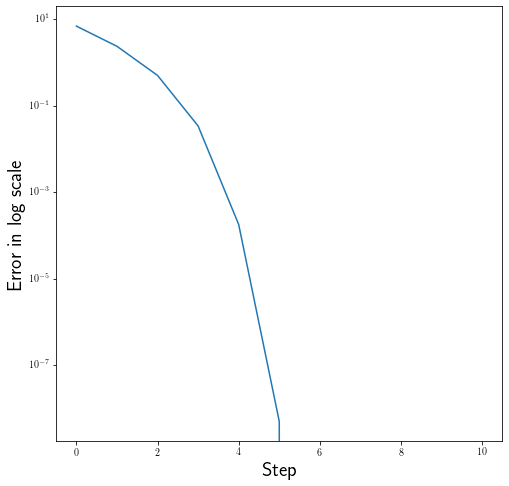

In [14]:
plt.plot([i for i in range(len(estimates))], [x - a ** 0.5 for x in estimates])
plt.xlabel('Step', fontsize=20)
plt.yscale('log')
plt.ylabel('Error in log scale', fontsize=20)
plt.show()